In [7]:
## MANDATORY 
## [IMPORT NECESSARY LIBRARIES]

import gensim
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib

import re
import codecs
import itertools
import matplotlib.pyplot as plt

print ('DONE [IMPORT NECESSARY LIBRARIES]')


DONE [IMPORT NECESSARY LIBRARIES]


In [8]:
## MANDATORY 
## [ETL] Import Data

input_file = codecs.open("socialmedia_relevant_cols.csv", "r",encoding='utf-8', errors='replace')

# read_csv will turn CSV files into dataframes
questions = pd.read_csv(input_file)

#let's give names to the columns of our dataframe
questions.columns=['text', 'choose_one', 'class_label']

print ('DONE - [ETL] Import Data')

DONE - [ETL] Import Data


In [9]:
## MANDATORY 
## [PREPROCESS] Text Cleaning

def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    # get rid of URLS
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"http\S+", "", elem))  
    return df

# call the text cleaning function
clean_questions = standardize_text(questions, "text")

print ('DONE - [PREPROCESS] Text Cleaning')

DONE - [PREPROCESS] Text Cleaning


In [11]:
clean_questions.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this #earthquake m...,Relevant,1
2,"heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask. canada,Relevant,1


In [14]:
clean_questions.groupby("class_label").count()

,text,choose_one
class_label,,
0,6187,6187
1,4673,4673
2,16,16


In [15]:
## MANDATORY
## [PREPROCESS] Tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this #earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about #earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask. canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [25]:
## [EDA] Explore words and sentences

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]

sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

158663 words total, with a vocabulary size of 21327


In [23]:
# [EDA] Explore Vocabulary

# What are the words in the vocabulary
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

['0', '00', '000', '0000', '00am', '00end', '00pm', '01', '02', '0215', '02pm', '03', '030', '032', '033', '034', '039', '04', '05', '0518', '05th', '06', '060', '061', '06jst', '07', '08', '0840728', '0853', '087809233445', '0880', '09', '0992', '0l', '0npzp', '1', '10', '100', '1000', '10000', '100000', '1000s', '1008pla', '1008planet', '100mb', '100nd', '100s', '101', '1017', '1023', '1028', '103', '105', '106', '1061thetwister', '107', '109', '10am', '10k', '10km', '10m', '10news', '10pm', '10th', '10w', '10x', '11', '11000', '11000000', '111020', '1115', '11211', '114', '1141', '1145', '1148', '115', '115film', '1179', '118', '119', '119000', '11am', '11th', '12', '120', '1200', '12000', '120000', '1200000', '120v', '1233newcastle', '1236', '124', '1245z', '125', '126', '129', '12am', '12hr']


[('the', 4621),
 ('a', 3109),
 ('to', 2837),
 ('in', 2808),
 ('of', 2610),
 ('i', 2511),
 ('and', 2023),
 ('s', 1403),
 ('is', 1392),
 ('you', 1287),
 ('for', 1245),
 ('on', 1238),
 ('it', 1141),
 ('my', 976),
 ('that', 853),
 ('with', 797),
 ('by', 777),
 ('at', 748),
 ('t', 723),
 ('this', 705),
 ('from', 614),
 ('are', 600),
 ('be', 596),
 ('was', 553),
 ('_', 535),
 ('have', 513),
 ('amp', 510),
 ('like', 493),
 ('as', 485),
 ('up', 471),
 ('just', 459),
 ('we', 449),
 ('me', 445),
 ('m', 439),
 ('but', 436),
 ('so', 432),
 ('not', 431),
 ('your', 429),
 ('out', 412),
 ('no', 401),
 ('all', 381),
 ('will', 372),
 ('after', 370),
 ('fire', 367),
 ('when', 365),
 ('can', 362),
 ('an', 358),
 ('if', 353),
 ('he', 351),
 ('has', 341),
 ('get', 336),
 ('new', 329),
 ('they', 327),
 ('more', 325),
 ('via', 325),
 ('about', 312),
 ('what', 311),
 ('2', 311),
 ('now', 309),
 ('or', 294),
 ('how', 293),
 ('news', 289),
 ('people', 285),
 ('one', 283),
 ('who', 271),
 ('there', 266),
 ('over

In [26]:
## MANDATORY 
## [CLASSIFY] Train test Split

from sklearn.model_selection import train_test_split

list_corpus = clean_questions["text"]
list_labels = clean_questions["class_label"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

print("Training set: %d samples" % len(X_train))
print("Test set: %d samples" % len(X_test))

Training set: 8700 samples
Test set: 2176 samples


In [29]:
print (X_test[:1])

10181    circus tent collapses in violent storm killing...
Name: text, dtype: object


In [31]:
print (y_train)

2354     0
9734     1
9332     0
10831    0
3125     1
9836     0
302      1
9872     0
4638     0
9309     0
4391     1
4597     1
4265     0
6641     1
956      0
7763     0
5985     0
2646     1
6893     1
10349    1
5908     0
5930     0
5980     0
2164     1
10161    1
4146     0
4472     1
5665     1
8088     0
912      1
        ..
6204     0
6686     1
5114     0
7090     1
1933     0
3484     1
509      1
3027     0
2289     1
2615     0
3783     1
6275     0
5142     1
3688     0
500      0
860      0
1231     0
3742     0
5449     0
9909     0
3889     0
2121     1
443      1
8147     1
10295    0
7839     0
3603     0
5959     0
5426     0
7608     0
Name: class_label, Length: 8700, dtype: int64


In [32]:
## MANDATORY FOR BOW EMBEDDING
## [EMBEDDING] Tranform Tweets to BOW Embedding

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(8700, 18738)
(2176, 18738)


In [34]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [EMBEDDING] Load Word2Vec Pretrained Corpus

word2vec_path = "GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

print ('DONE [Load Word2Vec Pretrained Corpus]')

DONE [Load Word2Vec Pretrained Corpus]


In [37]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [EMBEDDING] Get Word2Vec values for a Tweet

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions_tokens, generate_missing=False):
    embeddings = clean_questions_tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

# Call the functions
embeddings = get_word2vec_embeddings(word2vec, clean_questions['tokens'])

print ('[EMBEDDING] Get Word2Vec values for a Tweet')

[EMBEDDING] Get Word2Vec values for a Tweet


In [58]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [CLASSIFY] Word2Vec Train Test Split

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(embeddings, list_labels, 
                                                                    test_size=0.2, random_state=40)

w2v = dict()
w2v["train"] = (X_train_w2v, y_train_w2v)
w2v["test"]  = (X_test_w2v, y_test_w2v)

print ('DONE - [CLASSIFY] Word2Vec Train Test Split]')

DONE - [CLASSIFY] Word2Vec Train Test Split]


In [42]:
## MANDATORY FOR LOGISTIC REGRESSION CLASSIFIER
## [CLASSIFY] Initialize Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

print ('DONE - [CLASSIFY] Initialize Logistic Regression')

DONE - [CLASSIFY] Initialize Logistic Regression


In [64]:
## MANDATORY FOR SUPPORT VECTOR MACHINE CLASSIFIER
## [CLASSIFY] Initialize Support Vector Machine Classifier

from sklearn.svm import LinearSVC

lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

print ('[CLASSIFY] Initialize Support Vector Machine Classifier')

[CLASSIFY] Initialize Support Vector Machine Classifier


In [59]:
## MANDATORY FOR DECISION TREE
## [CLASSIFY] Initialize Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

print ('DONE - [CLASSIFY] Initialize Decision Tree')

DONE - [CLASSIFY] Initialize Decision Tree


In [51]:
## MANDATORY 
## [EVALUATE] Prepare Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

print ('DONE - [EVALUATE] Prepare Metrics')

DONE - [EVALUATE] Prepare Metrics


In [52]:
## MANDATORY
## [EVALUATE] Confusion Matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

print ('DONE - [EVALUATE] Confusion Matrix')

DONE - [EVALUATE] Confusion Matrix


In [53]:
## MANDATORY 
## [EMBEDDING] CHOOSE EMBEDDING

embedding = bow                  # bow | tfidf | w2v

print ('DONE - [EMBEDDING] CHOOSE EMBEDDING')

DONE - [EMBEDDING] CHOOSE EMBEDDING


In [68]:
## MANDATORY 
## [CLASSIFY] CHOOSE CLASSIFIER

classifier = lsvm_classifier     # lr_classifier | lsvm_classifier | nb_classifier| dt_classifier

print ('DONE - [CLASSIFY] CHOOSE CLASSIFIER')

DONE - [CLASSIFY] CHOOSE CLASSIFIER


In [69]:
## MANDATORY 
## [CLASSIFY] Train Classifier on Embeddings

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

print ('DONE - [CLASSIFY] Train Classifier on Embeddings')

DONE - [CLASSIFY] Train Classifier on Embeddings


In [70]:
## MANDATORY 
## [EVALUATE] Score chosen model

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.764, precision = 0.761, recall = 0.764, f1 = 0.762


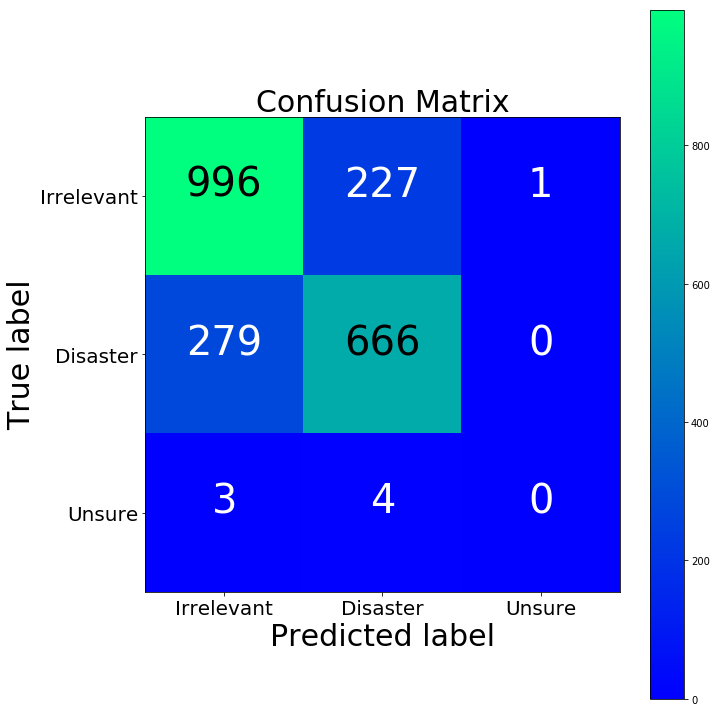

In [71]:
## MANDATORY 
## [EVALUATE] Confusion matrix for chosen model

cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster', 'Unsure'], normalize=False, title='Confusion Matrix')
plt.show()

In [2]:
import nltk
